
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate=0, annual_returns='1 Yr')
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,4.87,-20.39,14.34,12.38,16.36,49.73,25.70,10.23,16.16,15.93,14.34,16.16,0.89
1,DIA,DJIA ETF,US Stocks:Large Cap,-22.31,-24.88,11.00,9.45,13.43,39.84,21.40,12.89,16.54,15.88,11.00,16.54,0.67
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,37.08,-22.81,15.83,16.35,18.95,55.48,27.32,12.42,19.77,20.21,15.83,19.77,0.80
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,3.73,-22.93,13.65,11.65,15.89,48.41,25.18,11.06,16.54,16.26,13.65,16.54,0.83
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,-12.17,-38.05,3.51,3.77,10.58,42.60,21.93,20.01,22.66,21.47,3.51,22.66,0.15
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,-17.90,-31.55,3.84,6.60,13.86,45.24,22.49,15.62,20.45,18.90,3.84,20.45,0.19
6,IWD,Russell 1000 Value ETF,US Stocks:Value,-23.77,-15.26,9.86,7.40,13.13,38.65,23.07,12.76,16.47,15.75,9.86,16.47,0.60
7,IWF,Russell 1000 Growth ETF,US Stocks:Growth,38.40,-27.77,17.31,16.00,18.31,53.96,26.29,13.77,18.59,19.13,17.31,18.59,0.93
8,RSP,S&P 500 Equal Weight ETF,US Stocks:Growth,-18.58,-17.53,8.38,6.60,14.37,41.10,22.67,11.98,17.83,16.91,8.38,17.83,0.47
9,SPSM,S&P 600 Small Cap ETF,US Stocks:Small Cap,-32.15,-42.12,0.73,2.74,12.36,43.14,22.02,20.49,22.75,21.21,0.73,22.75,0.03


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
15,XLC,S&P500 Communication Services Sector ETF,US Stocks:Communication Services,7.30,-17.04,26.53,19.54,16.19,44.07,24.33,10.97,18.27,18.92,26.53,18.27,1.45
22,XLU,S&P500 Utilities Sector ETF,US Stocks:Utilities,5.10,13.11,23.15,6.44,9.53,29.97,20.44,14.85,16.38,16.82,23.15,16.38,1.41
17,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,-9.16,-11.37,25.21,14.20,19.18,43.10,26.96,15.60,19.63,19.57,25.21,19.63,1.28
21,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,-4.19,7.73,19.89,-1.07,7.79,33.78,20.06,14.72,20.42,19.30,19.89,20.42,0.97
20,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,0.15,16.15,10.83,3.96,9.46,26.32,15.53,10.63,12.86,13.31,10.83,12.86,0.84
24,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,-10.55,-42.71,15.72,7.16,12.82,50.06,21.96,18.96,24.15,22.49,15.72,24.15,0.65
18,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,14.71,-9.36,12.39,13.52,17.76,43.37,23.55,14.28,19.19,18.92,12.39,19.19,0.65
19,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,49.00,-21.88,11.13,16.11,20.69,61.76,29.31,13.94,21.61,21.01,11.13,21.61,0.52
23,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,-38.72,-19.62,0.31,3.30,8.53,32.52,22.08,12.88,13.39,14.00,0.31,13.39,0.02
14,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,-25.20,-14.68,-2.32,1.92,12.47,45.78,24.79,14.56,21.00,19.67,-2.32,21.00,-48.72


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLC,XLU,XLF,XLRE,XLP,XLY,XLI,XLK,XLV,XLB,XLE,All S&P500 Sectors Portfolio
Annual Returns,26.53,23.15,25.21,19.89,10.83,15.72,12.39,11.13,0.31,-2.32,-9.46,12.93
Std Dev,18.27,16.38,19.63,20.42,12.86,24.15,19.19,21.61,13.39,21.00,25.50,15.08
Sharpe Ratio,1.45,1.41,1.28,0.97,0.84,0.65,0.65,0.52,0.02,-48.72,-241.23,0.86
Weight,0.09,0.10,0.08,0.10,0.14,0.10,0.09,0.07,0.10,0.08,0.05,1.00
Worst Typical Down Year,-10.01,-9.61,-14.05,-20.95,-14.89,-32.58,-25.99,-32.09,-26.47,-44.32,-60.46,-17.24
Black Swan,-28.28,-25.99,-33.68,-41.37,-27.75,-56.73,-45.18,-53.70,-39.86,-65.32,-85.96,-32.32


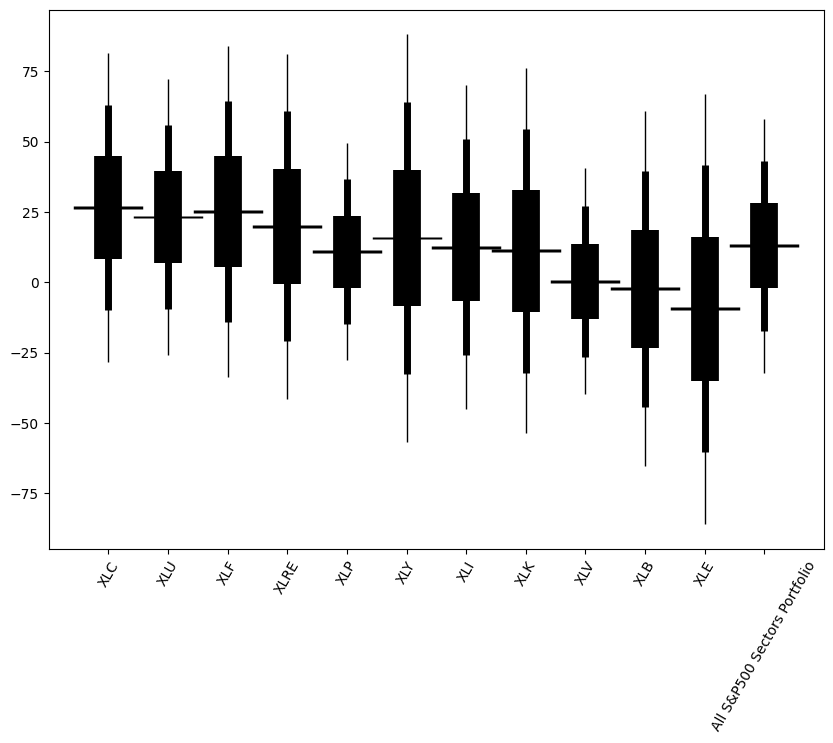

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

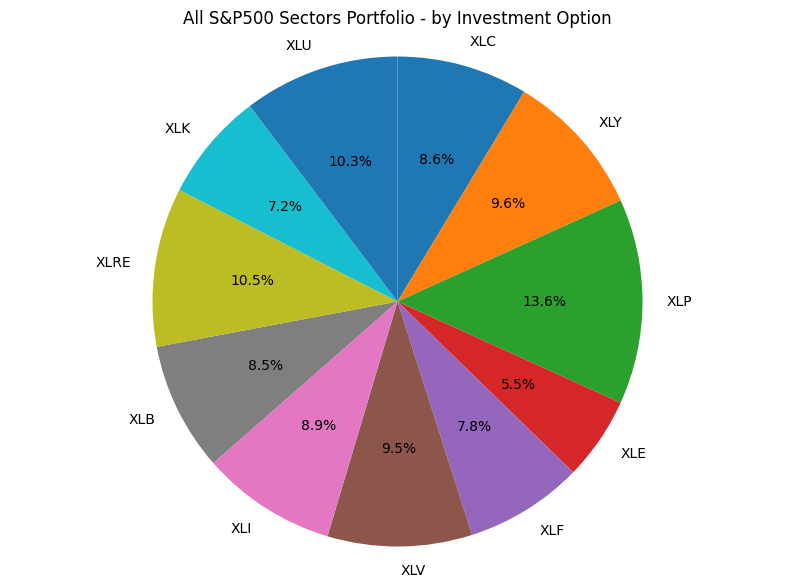

XLC    0.09
XLY    0.10
XLP    0.14
XLE    0.05
XLF    0.08
XLV    0.10
XLI    0.09
XLB    0.08
XLRE   0.10
XLK    0.07
XLU    0.10



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLC                            0.0865
    XLU                            0.1030
    XLF                            0.0781
    XLRE                           0.1049
    XLP                            0.1355
    XLY                            0.0958
    XLI                            0.0894
    XLK                            0.0718
    XLV                            0.0953
    XLB                            0.0849
    XLE                            0.0549


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).